<a href="https://colab.research.google.com/github/facundocarballo/ProgramacionConcurrente/blob/main/TP1/Parte4/CPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sincronizacion

Este progrma cuenta con 2 variables globales
- Un array de 10 enteros.
- Un entero que referencia a la suma total de los numeros del array.

La idea es que se sumen todos los enteros del array y quede guardado en el entero definido para eso. 

Para hacer esto, utilizamos 2 hilos que trabajaran en forma concurrente.

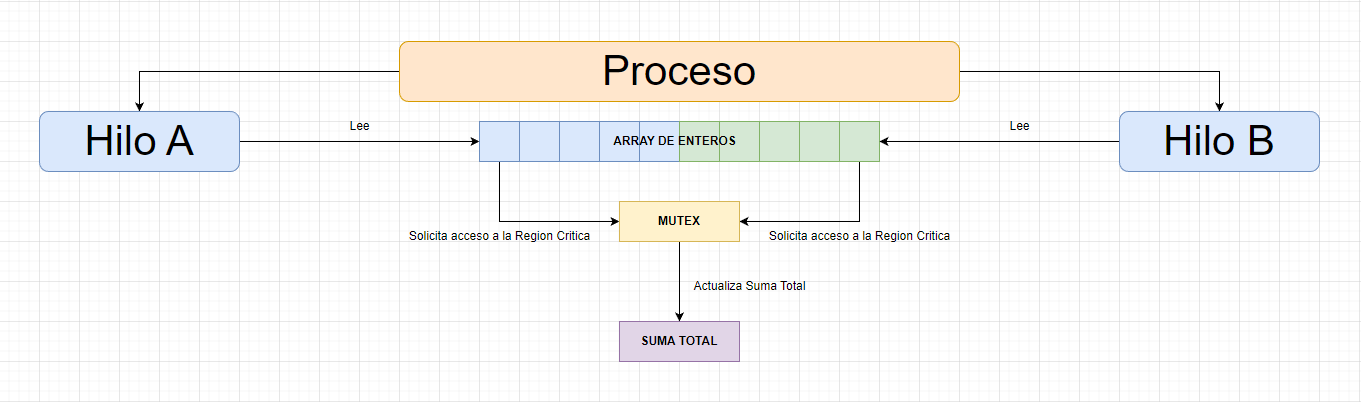

Cuando uno de los hilos quiera incrementar la variable global, estara entrando a la region critica. Por lo que ahi habra un mutex que permitira la sincronizacion de estos dos hilos que estan trabajando con un mismo recurso compartido.

# Codigo

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <mutex>
#include <thread>

#define INIT_POS 0
#define MAX_POS 10
#define MIDDLE_POS (MAX_POS / 2)

// Global Variables
int arr[MAX_POS] = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10};
int suma_total;
std::mutex mtx;

void Suma(int i, int max) 
{
  for (i; i < max; i++) 
  {
    mtx.lock();
    suma_total += arr[i];
    mtx.unlock();
  }
}

int main() 
{
  std::thread hilo_a(Suma, INIT_POS, MIDDLE_POS);
  std::thread hilo_b(Suma, MIDDLE_POS, MAX_POS);

  hilo_a.join();
  hilo_b.join();
  
  std::cout << "Suma Total: " << suma_total << std::endl;

  return EXIT_SUCCESS;
}

Writing main.cpp


# Implementacion

Compilamos el programa.

In [ ]:
!g++ main.cpp -lpthread -o main

Ejecutamos el programa.

In [ ]:
!./main

Suma Total: 55
